Will the user click on ad?:) First attempt on ML. Basicly made as a reference for myself..Done with KNN

In [50]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#enables matplotlib in jupyter
%matplotlib inline

In [5]:
#read csv file to pandas dataframe
train = pd.read_csv('advertising.csv')

In [6]:
#explore data
train.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


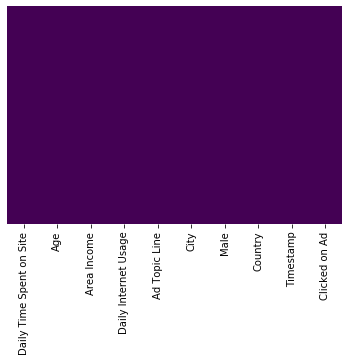

In [7]:
#check for NaN data (none found)
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

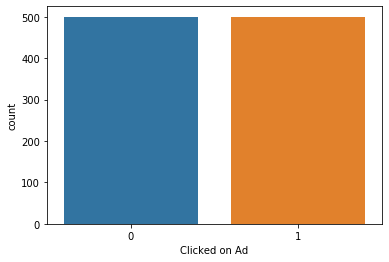

In [8]:
#check the proportion of target data
sns.countplot(x='Clicked on Ad', data=train)

In [9]:
#check dataframe info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [10]:
#get rid of columns
train.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp'], axis=1, inplace=True)

In [11]:
train.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


# Building a KNN model 

In [12]:
#standardise everything to the same scale for KNN
from sklearn.preprocessing import StandardScaler

In [18]:
#feed the scaler data without a target column
scaler = StandardScaler()
scaler.fit(train.drop('Clicked on Ad', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [23]:
#Transform data
scaled_features = scaler.transform(train.drop('Clicked on Ad', axis=1))

In [24]:
scaled_features

array([[ 0.24926659, -0.11490498,  0.50969109,  1.73403   , -0.96269532],
       [ 0.96113227, -0.57042523,  1.00253021,  0.31380538,  1.03875025],
       [ 0.28208309, -1.13982553,  0.35694859,  1.28758905, -0.96269532],
       ...,
       [-0.84377541,  1.707176  , -0.93857029, -1.35892388,  1.03875025],
       [-0.59638946, -1.93698596, -0.97548353,  0.18117208, -0.96269532],
       [-1.26155474, -1.13982553, -1.87383208, -0.0376045 , -0.96269532]])

In [29]:
#Convert the array to pandas dataframe, add all column names, except the last one
df_features = pd.DataFrame(scaled_features, columns=train.columns[:-1])

In [30]:
df_features.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,0.249267,-0.114905,0.509691,1.734030,-0.962695
1,0.961132,-0.570425,1.002530,0.313805,1.038750
2,0.282083,-1.139826,0.356949,1.287589,-0.962695
3,0.577432,-0.798185,-0.014456,1.501580,1.038750
4,0.212664,-0.114905,1.408868,1.038731,-0.962695


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df_features, train['Clicked on Ad'], test_size=0.3, random_state=101)

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=14) #first tried with k value 1

In [54]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='uniform')

In [55]:
pred = knn.predict(X_test)

In [56]:
from sklearn.metrics import classification_report, confusion_matrix

In [57]:
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       162
           1       0.99      0.92      0.96       168

    accuracy                           0.96       330
   macro avg       0.96      0.96      0.96       330
weighted avg       0.96      0.96      0.96       330

[[161   1]
 [ 13 155]]


Better than with LogisticRegression! :)

In [41]:
#find a better k value
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0.5, 1.0, 'Error Rate VS K Values')

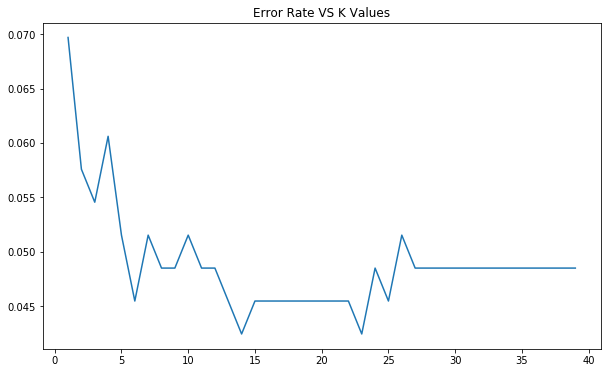

In [52]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate)
plt.title('Error Rate VS K Values')

looks like 14 is the best choice...